## EXPLORATORY DATA ANALYSIS ON SALES PERFORMANCE OF A MOBILE PHONE STORE

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

C:\Users\HP\AppData\Local\Temp\ipykernel_13548\1927334565.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('mobilephone_sales.csv')

In [3]:
df.head()

,Brands,Models,Colors,Memory,Storage,Camera,Rating,Selling Price,Original Price,Mobile,Discount,discount percentage,Unnamed: 12,Status
0,SAMSUNG,GALAXY M31S,Mirage Black,8 GB,128 GB,Yes,4.3,19330,20999,SAMSUNG GALAXY M31S,1669,7.947998,NaN,NaN
1,Nokia,3.2,Steel,2 GB,16 GB,Yes,3.8,10199,10199,Nokia 3.2,0,0.000000,NaN,NaN
2,realme,C2,Diamond Black,2 GB,NaN,Yes,4.4,6999,7999,realme C2,1000,12.501563,NaN,NaN
3,Infinix,Note 5,Ice Blue,4 GB,64 GB,Yes,4.2,12999,12999,Infinix Note 5,0,0.000000,NaN,NaN
4,Apple,iPhone 11,Black,4GB,64 GB,Yes,4.6,49900,49900,Apple iPhone 11,0,0.000000,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3114 entries, 0 to 3113
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brands               3114 non-null   object 
 1   Models               3114 non-null   object 
 2   Colors               3114 non-null   object 
 3   Memory               3071 non-null   object 
 4   Storage              3075 non-null   object 
 5   Camera               3114 non-null   object 
 6   Rating               2970 non-null   float64
 7   Selling Price        3114 non-null   int64  
 8   Original Price       3114 non-null   int64  
 9   Mobile               3114 non-null   object 
 10  Discount             3114 non-null   int64  
 11  discount percentage  3114 non-null   float64
 12  Unnamed: 12          0 non-null      float64
 13  Status               0 non-null      float64
dtypes: float64(4), int64(3), object(7)
memory usage: 340.7+ KB


In [5]:
df.describe()

,Rating,Selling Price,Original Price,Discount,discount percentage,Unnamed: 12,Status
count,2970.000000,3114.000000,3114.000000,3114.000000,3114.000000,0.0,0.0
mean,4.243098,26436.625562,28333.473025,1896.847463,6.086788,NaN,NaN
std,0.271991,30066.892622,31525.599889,5337.126176,11.106776,NaN,NaN
min,2.300000,1000.000000,1000.000000,-8000.000000,-160.320641,NaN,NaN
25%,4.100000,9990.000000,10030.250000,0.000000,0.000000,NaN,NaN
50%,4.300000,15000.000000,16889.500000,0.000000,0.000000,NaN,NaN
75%,4.400000,28999.000000,31500.000000,2000.000000,9.836388,NaN,NaN
max,5.000000,179900.000000,189999.000000,75000.000000,70.610305,NaN,NaN


In [6]:
df.isnull().sum()

Brands                    0
Models                    0
Colors                    0
Memory                   43
Storage                  39
Camera                    0
Rating                  144
Selling Price             0
Original Price            0
Mobile                    0
Discount                  0
discount percentage       0
Unnamed: 12            3114
Status                 3114
dtype: int64

In [7]:
df.columns

Index(['Brands', 'Models', 'Colors', 'Memory', 'Storage', 'Camera', 'Rating',
       'Selling Price', 'Original Price', 'Mobile', 'Discount',
       'discount percentage', 'Unnamed: 12', 'Status'],
      dtype='object')

In [8]:
df = df.drop(columns= ['Unnamed: 12','Status'])


In [9]:
df.head()

,Brands,Models,Colors,Memory,Storage,Camera,Rating,Selling Price,Original Price,Mobile,Discount,discount percentage
0,SAMSUNG,GALAXY M31S,Mirage Black,8 GB,128 GB,Yes,4.3,19330,20999,SAMSUNG GALAXY M31S,1669,7.947998
1,Nokia,3.2,Steel,2 GB,16 GB,Yes,3.8,10199,10199,Nokia 3.2,0,0.000000
2,realme,C2,Diamond Black,2 GB,NaN,Yes,4.4,6999,7999,realme C2,1000,12.501563
3,Infinix,Note 5,Ice Blue,4 GB,64 GB,Yes,4.2,12999,12999,Infinix Note 5,0,0.000000
4,Apple,iPhone 11,Black,4GB,64 GB,Yes,4.6,49900,49900,Apple iPhone 11,0,0.000000


In [10]:
df = df.dropna()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2897 entries, 0 to 3113
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brands               2897 non-null   object 
 1   Models               2897 non-null   object 
 2   Colors               2897 non-null   object 
 3   Memory               2897 non-null   object 
 4   Storage              2897 non-null   object 
 5   Camera               2897 non-null   object 
 6   Rating               2897 non-null   float64
 7   Selling Price        2897 non-null   int64  
 8   Original Price       2897 non-null   int64  
 9   Mobile               2897 non-null   object 
 10  Discount             2897 non-null   int64  
 11  discount percentage  2897 non-null   float64
dtypes: float64(2), int64(3), object(7)
memory usage: 294.2+ KB


In [12]:
def convert_to_gb(value):
    if isinstance(value, (int, float)):
        return value  # If it's already a number, return it as is
    try:
        if 'GB' in value:
            return float(value.replace('GB', '').strip())
        elif 'MB' in value:
            return float(value.replace('MB', '').strip()) / 1024  # Convert MB to GB
    except ValueError:
        # Handle non-numeric values or other unexpected formats
        return None

In [13]:
df['Memory'] = df['Memory'].apply(convert_to_gb)

In [14]:
df['Storage'] = df['Storage'].apply(convert_to_gb)

In [15]:
df.head()

,Brands,Models,Colors,Memory,Storage,Camera,Rating,Selling Price,Original Price,Mobile,Discount,discount percentage
0,SAMSUNG,GALAXY M31S,Mirage Black,8.000000,128.000000,Yes,4.3,19330,20999,SAMSUNG GALAXY M31S,1669,7.947998
1,Nokia,3.2,Steel,2.000000,16.000000,Yes,3.8,10199,10199,Nokia 3.2,0,0.000000
3,Infinix,Note 5,Ice Blue,4.000000,64.000000,Yes,4.2,12999,12999,Infinix Note 5,0,0.000000
4,Apple,iPhone 11,Black,4.000000,64.000000,Yes,4.6,49900,49900,Apple iPhone 11,0,0.000000
5,GIONEE,L800,Black,0.007812,0.015625,Yes,4.0,2199,2199,GIONEE L800,0,0.000000


In [16]:
df.describe()

,Memory,Storage,Rating,Selling Price,Original Price,Discount,discount percentage
count,2897.000000,2874.000000,2897.000000,2897.000000,2897.000000,2897.000000,2897.000000
mean,4.072941,83.948158,4.241319,24692.492233,26656.677943,1964.185709,6.222417
std,2.417590,84.012652,0.272841,26373.592602,28251.233298,5505.394873,11.353050
min,0.001953,0.001953,2.300000,1000.000000,1000.000000,-8000.000000,-160.320641
25%,2.000000,32.000000,4.100000,9990.000000,10389.000000,0.000000,0.000000
50%,4.000000,64.000000,4.300000,14999.000000,16300.000000,0.000000,0.000000
75%,6.000000,128.000000,4.400000,27499.000000,29999.000000,2000.000000,9.836388
max,16.000000,512.000000,5.000000,179900.000000,189999.000000,75000.000000,70.610305


In [17]:
# Total and average selling price for each brand
brand_sales = df.groupby('Brands')['Selling Price'].agg(['sum', 'mean'])
print(brand_sales)

                   sum          mean
Brands                              
ASUS           1952583  17590.837838
Apple         23395613  73340.479624
GIONEE          903247   7112.181102
Google Pixel   1780364  61391.862069
HTC            1557291  28314.381818
IQOO            185950  37190.000000
Infinix        1674919  11092.178808
LG             1882996  19214.244898
Lenovo         1206655  10055.458333
Motorola       1671536  16228.504854
Nokia          1839036   9994.760870
OPPO           4639939  18485.812749
POCO           1223427  16759.273973
SAMSUNG       16999990  24817.503650
Xiaomi         3234625  16935.209424
realme         4702465  16734.750890
vivo           2683514  23539.596491


In [18]:
# Top-selling brands and models
top_brands = df['Brands'].value_counts().head()
top_models = df['Models'].value_counts().head()
print(top_brands)
print(top_models)

Brands
SAMSUNG    685
Apple      319
realme     281
OPPO       251
Xiaomi     191
Name: count, dtype: int64
Models
iPhone 11         36
iPhone XR         27
3                 26
iPhone 7          21
iPhone 11 Pro     21
Name: count, dtype: int64


In [19]:
# Average discount percentage for each brand
avg_discount = df.groupby('Brands')['discount percentage'].mean()
print(avg_discount)


Brands
ASUS             1.356927
Apple            4.704446
GIONEE           5.993977
Google Pixel     2.068506
HTC              0.000000
IQOO             9.065627
Infinix          6.877393
LG               8.806998
Lenovo           2.434600
Motorola        12.774220
Nokia            5.771331
OPPO             8.433480
POCO            14.543372
SAMSUNG          5.998641
Xiaomi           3.933391
realme           8.366239
vivo             4.801150
Name: discount percentage, dtype: float64


In [20]:
# Select numeric columns for correlation calculation
numeric_cols = ['Memory', 'Storage', 'Rating', 'Selling Price', 'Original Price', 'Discount', 'discount percentage']

# Calculate correlation matrix
correlation_matrix = df[numeric_cols].corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Correlation with Selling Price
correlation_with_selling_price = correlation_matrix['Selling Price'].sort_values(ascending=False)
print("\nCorrelation with Selling Price:")
print(correlation_with_selling_price)


Correlation Matrix:
                       Memory   Storage    Rating  Selling Price  \
Memory               1.000000  0.623569  0.352184       0.314186   
Storage              0.623569  1.000000  0.455872       0.712428   
Rating               0.352184  0.455872  1.000000       0.458876   
Selling Price        0.314186  0.712428  0.458876       1.000000   
Original Price       0.348861  0.705632  0.450786       0.982026   
Discount             0.285092  0.218675  0.114989       0.248822   
discount percentage  0.200786  0.082419  0.054372      -0.036126   

                     Original Price  Discount  discount percentage  
Memory                     0.348861  0.285092             0.200786  
Storage                    0.705632  0.218675             0.082419  
Rating                     0.450786  0.114989             0.054372  
Selling Price              0.982026  0.248822            -0.036126  
Original Price             1.000000  0.427157             0.095281  
Discount             

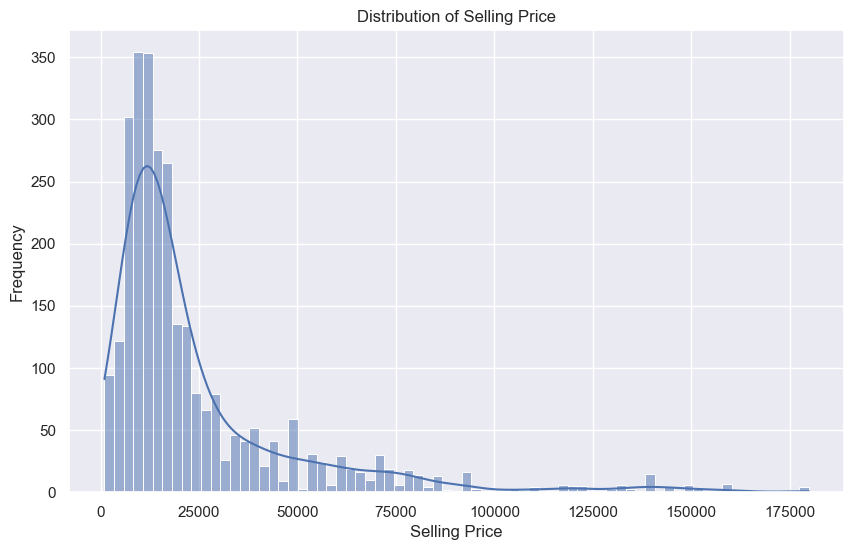

In [21]:
# Distribution of Selling Price
plt.figure(figsize=(10, 6))
sns.histplot(df['Selling Price'], kde=True)
plt.title('Distribution of Selling Price')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()

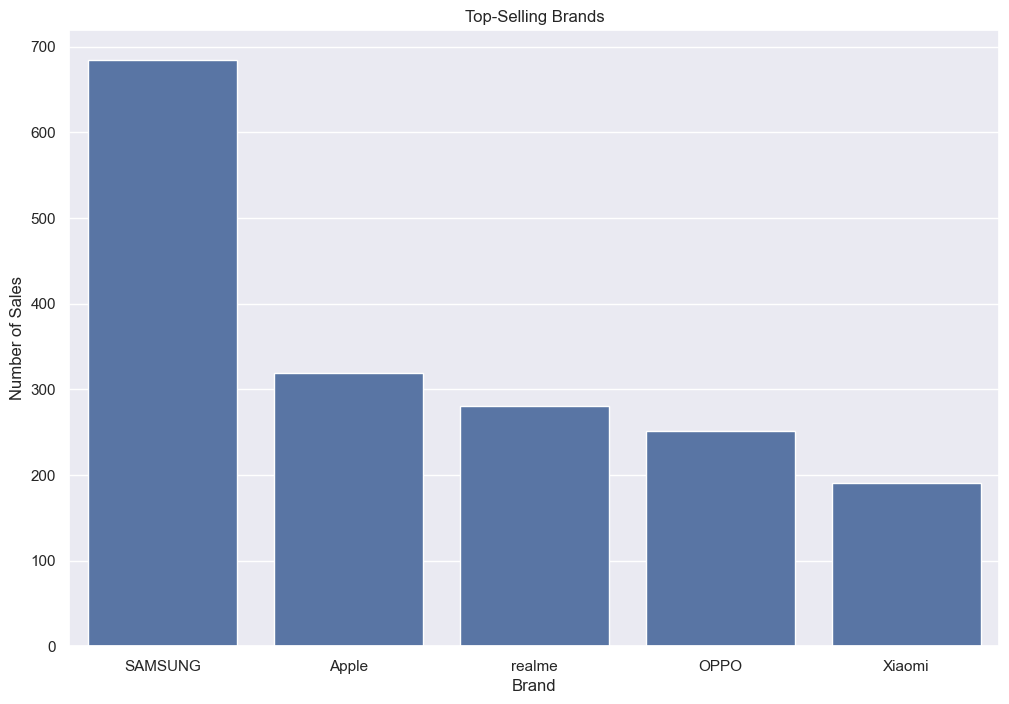

In [22]:
# Sales performance of different brands
plt.figure(figsize=(12, 8))
sns.barplot(x=top_brands.index, y=top_brands.values)
plt.title('Top-Selling Brands')
plt.xlabel('Brand')
plt.ylabel('Number of Sales')
plt.show()

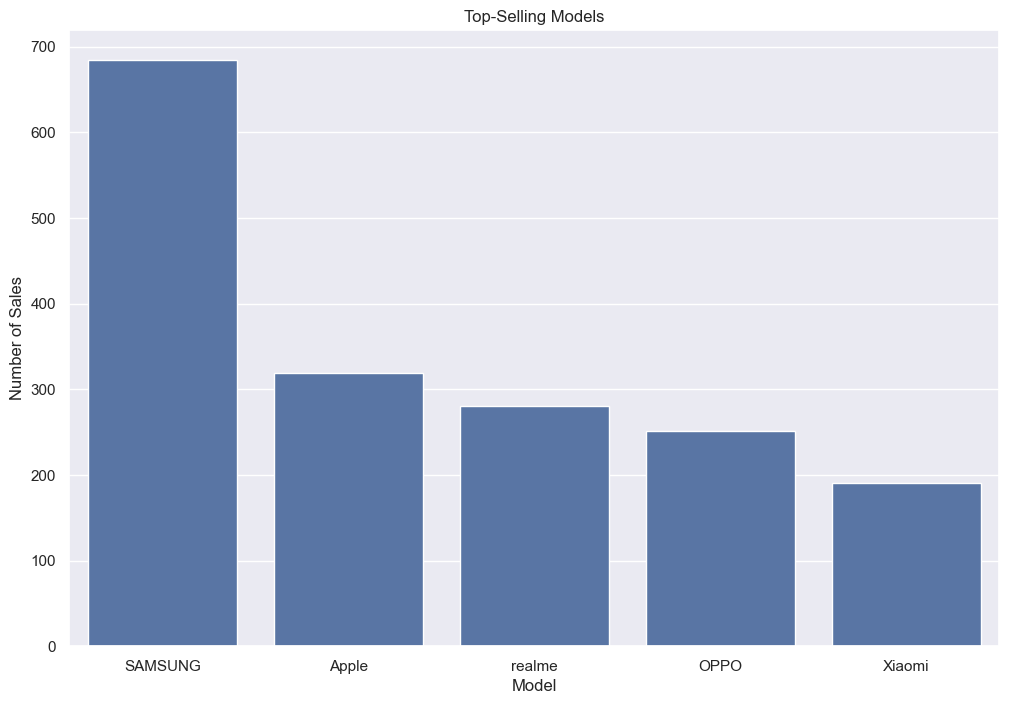

In [23]:
# Sales performance of different models
plt.figure(figsize=(12, 8))
sns.barplot(x=top_brands.index, y=top_brands.values)
plt.title('Top-Selling Models')
plt.xlabel('Model')
plt.ylabel('Number of Sales')
plt.show()

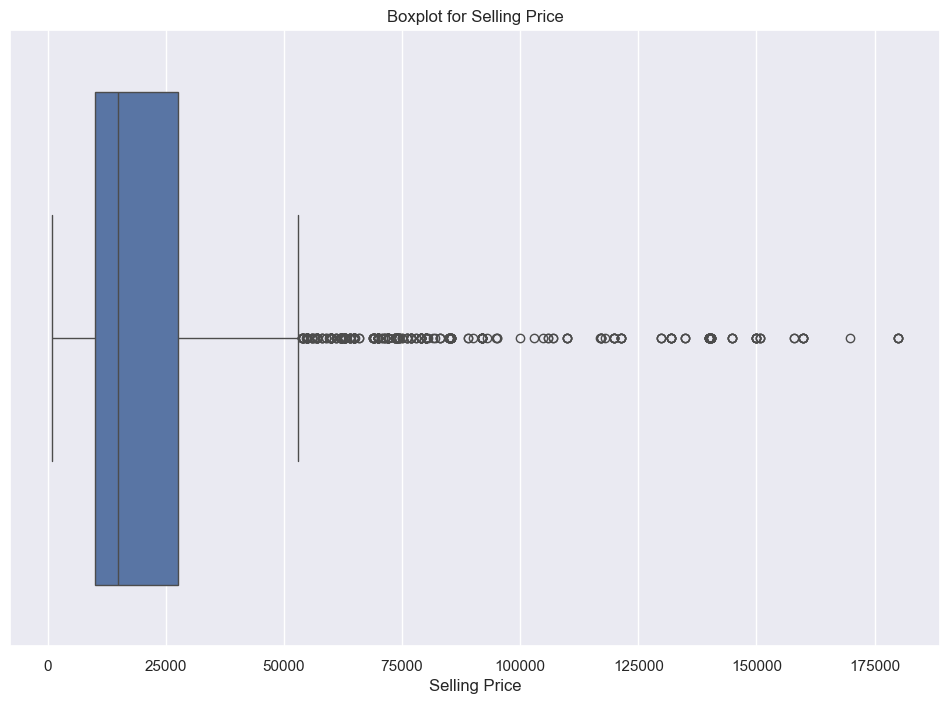

In [24]:
# Boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x=df['Selling Price'])
plt.title('Boxplot for Selling Price') 
plt.show()

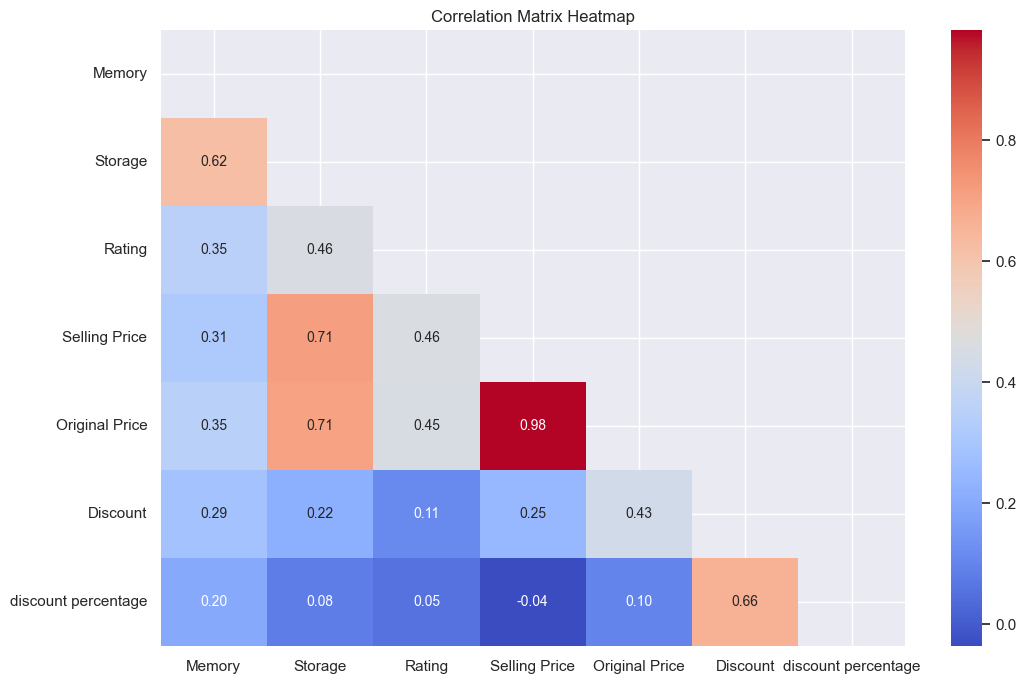

In [25]:
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(12, 8))

# Drawing the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, cmap='coolwarm', annot=True, fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix Heatmap')
plt.show()

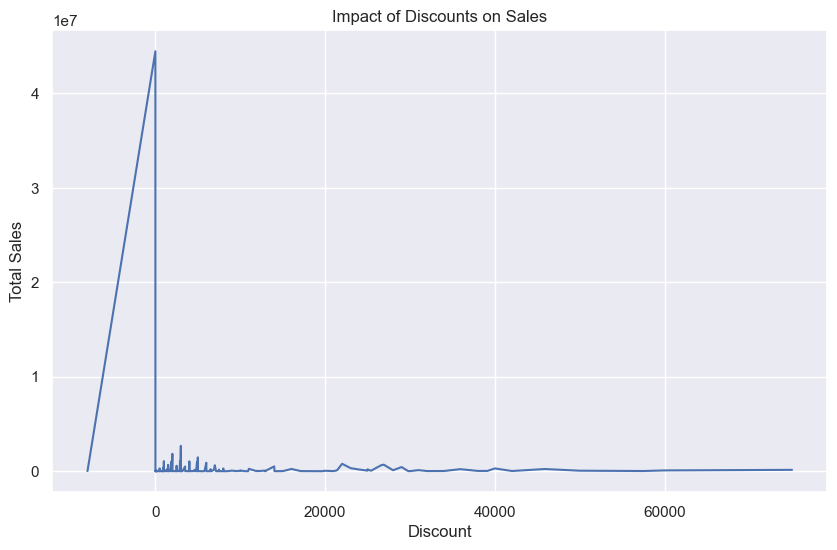

In [26]:
# Impact of discounts on sales
discount_impact = df.groupby('Discount')['Selling Price'].sum().sort_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x=discount_impact.index, y=discount_impact.values)
plt.title('Impact of Discounts on Sales')
plt.xlabel('Discount')
plt.ylabel('Total Sales')
plt.show()

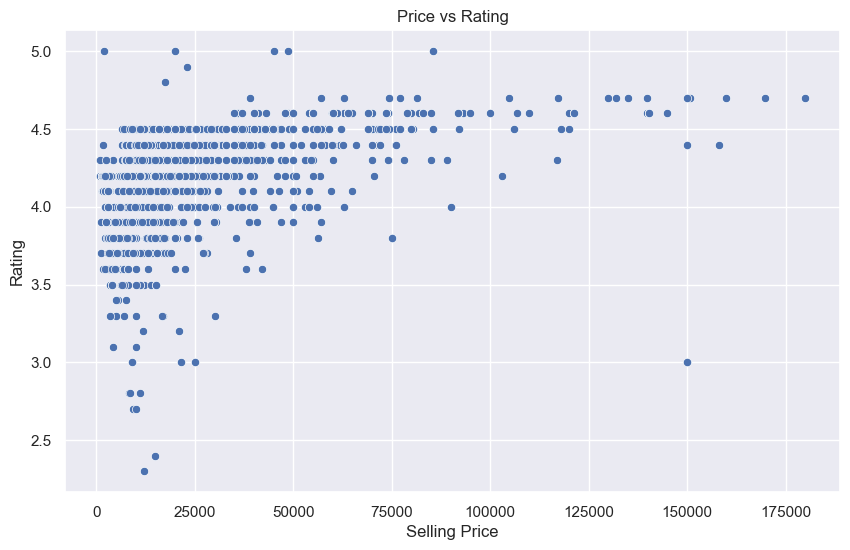

In [27]:
# Correlation between price and rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Selling Price'], y=df['Rating'])
plt.title('Price vs Rating')
plt.xlabel('Selling Price')
plt.ylabel('Rating')
plt.show()


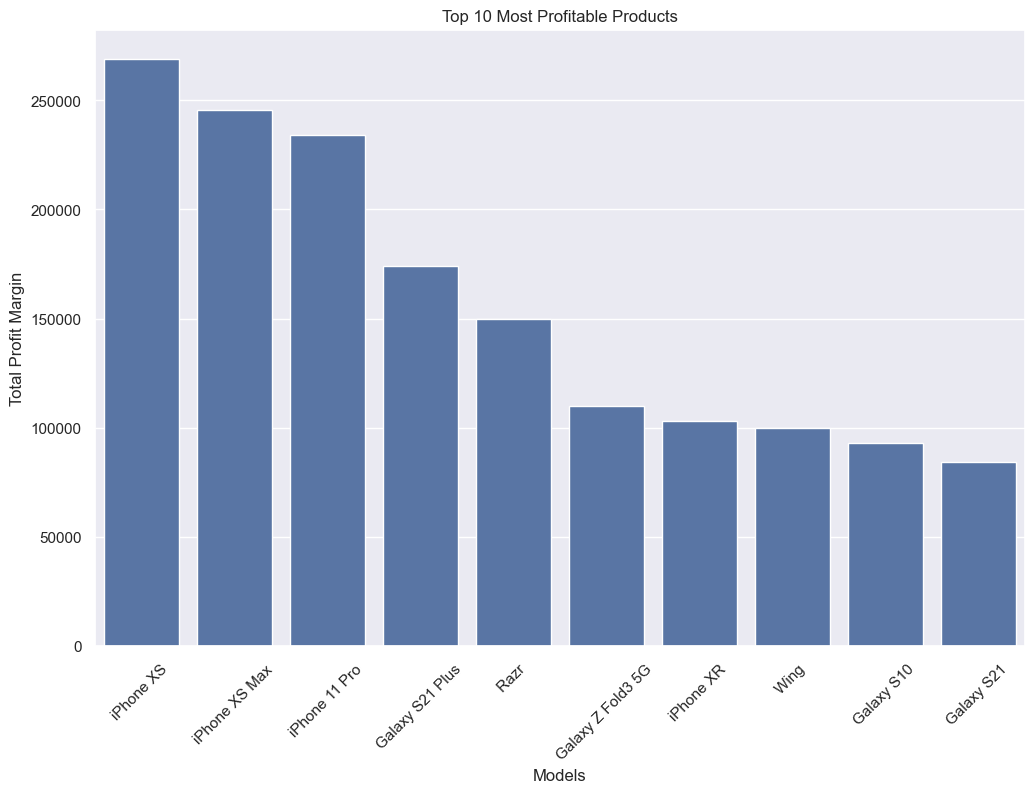

In [28]:
# Calculate profit margins
df['Profit Margin'] = df['Original Price'] - df['Selling Price']
# Most profitable products
most_profitable_products = df.groupby('Models')['Profit Margin'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x=most_profitable_products.index[:10], y=most_profitable_products.values[:10])
plt.title('Top 10 Most Profitable Products')
plt.xlabel('Models')
plt.ylabel('Total Profit Margin')
plt.xticks(rotation=45)
plt.show()


##  Strategies for improvement

#### Optimize Pricing Strategy:
##### Implement a dynamic pricing strategy based on demand, competition, and seasonal trends. Introduce bundle offers with accessories or services to increase perceived value and sales volume.

#### Enhance Product Features:
##### Regularly analyze customer reviews and ratings to identify desired features and areas of improvement. Invest in R&D to introduce innovative features that differentiate products from competitors.

#### Improve Marketing Efforts:
##### Use data-driven insights to create targeted marketing campaigns focusing on high-demand segments. Collaborate with tech influencers and reviewers to increase product visibility and credibility.

#### Expand Distribution Channels:
##### Strengthen online presence through partnerships with e-commerce platforms and social media marketing. Explore new retail partnerships and geographic markets to reach a wider audience.

#### Enhance Customer Experience and Leverage Data Analytics:
##### Improve customer support services with faster response times and efficient resolution of issues. Use predictive analytics to forecast demand and optimize inventory management. Segment customers based on purchase behavior and tailor marketing strategies accordingly.